In [2]:
from typing import TypedDict, Literal

class PortfolioState(TypedDict):
    amount_usd : float
    total_usd : float
    target_currency : Literal["EUR", "INR"]
    total : float

In [4]:
def calc_total(state: PortfolioState):
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

def convert_to_inr(state: PortfolioState):
    state['total'] = state['total_usd'] * 85
    return state

def convert_to_eur(state: PortfolioState):
    state['total'] = state['total_usd'] * 0.9
    return state

def choose_conversion(state: PortfolioState):
    return state['target_currency']

In [6]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node('calc_total_node', calc_total)
builder.add_node('convert_to_eur_node', convert_to_eur)
builder.add_node('convert_to_inr_node', convert_to_inr)

builder.add_edge(START, 'calc_total_node')
builder.add_conditional_edges(
    'calc_total_node',
    choose_conversion,
    {
        "EUR": "convert_to_eur_node",
        "INR": "convert_to_inr_node",
    }
)
builder.add_edge('convert_to_eur_node', END)
builder.add_edge('convert_to_inr_node', END)

graph = builder.compile()

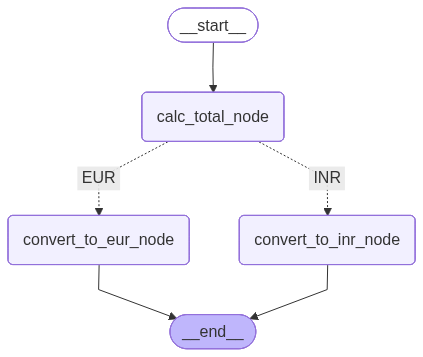

In [7]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
graph.invoke({'amount_usd': 1000, 'target_currency':'EUR'})

{'amount_usd': 1000,
 'total_usd': 1080.0,
 'target_currency': 'EUR',
 'total': 972.0}